# Iris Dataset

**Context**

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

This dataset became a typical test case for many statistical classification techniques in machine learning such as support vector machines

Content
The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).

In [1]:
# required libraries

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
# read the dataset
iris_data = pd.read_csv('iris_table.csv')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris_data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

**Fixing the the headings**

In [6]:
iris_data.columns = iris_data.columns.str.title()

In [7]:
iris_data.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width',
       'Species'],
      dtype='object')

**label encode the target variable**

In [8]:
encode = LabelEncoder()
iris_data.Species = encode.fit_transform(iris_data.Species)


In [33]:
iris_data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Exploratory Data Analysis

Let's create some simple plots to check out the data!

In [34]:
iris_data.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal_Length    150 non-null float64
Sepal_Width     150 non-null float64
Petal_Length    150 non-null float64
Petal_Width     150 non-null float64
Species         150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


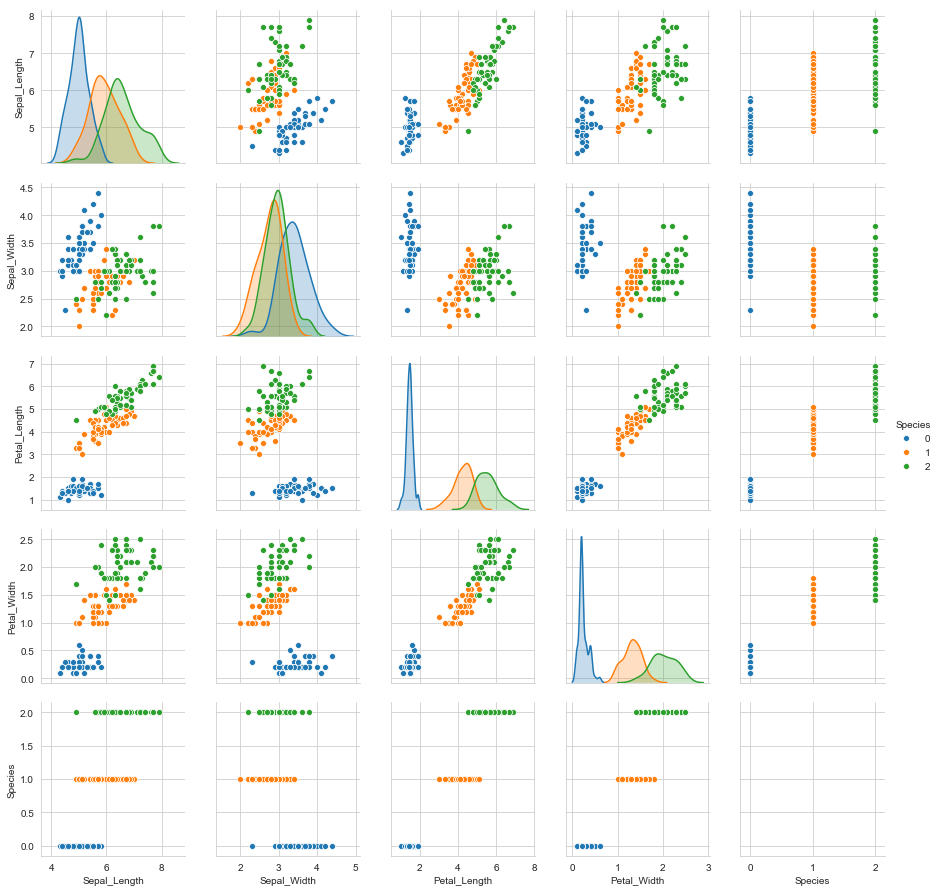

In [38]:
sns.set_style("whitegrid")
sns.pairplot(iris_data, hue="Species")

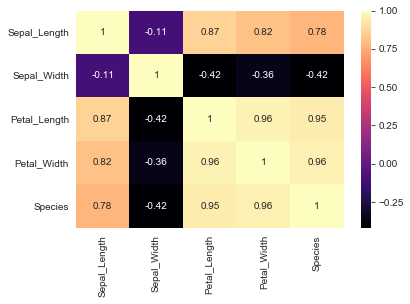

In [41]:
sns.heatmap(iris_data.corr(), cmap="magma",annot=True)


## Train Test Split
let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [42]:
from sklearn.model_selection import train_test_split

In [44]:
X = iris_data.drop('Species', axis=1)
y = iris_data['Species']

In [98]:
# train-test-split   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)


In [99]:
print('shape of training data : ',train.shape)
print('shape of testing data',test.shape)



shape of training data :  (120, 5)
shape of testing data (30, 5)


In [100]:
# create the object of the model
model = LogisticRegression(solver='newton-cg', multi_class='auto')

model.fit(X_train,y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [101]:
predict = model.predict(X_test)
predict

array([0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 2,
       1, 0, 2, 1, 0, 1])

## Model Evaluation
Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [102]:
from sklearn.metrics import classification_report,confusion_matrix

In [103]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, predict))
print(confusion_matrix(y_test, predict))

# Accuracy score
print('\n\nAccuracy Score on test data : \n\n')
print(accuracy_score(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.95      0.98        22
           2       0.93      1.00      0.96        13

   micro avg       0.98      0.98      0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

[[15  0  0]
 [ 0 21  1]
 [ 0  0 13]]


Accuracy Score on test data : 


0.98
